# Time-Series Analysis and Forecasting Covid Confirmed Cases
# (01-2020 to 07-2022)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading Dataset

In [14]:
data = pd.read_csv(r'D:\SNU\SEM 4\ML\Datasets\ds\codatasset.csv',parse_dates=['Date'])

In [15]:
data.head()

,Date,Confirmed
0,2020-01-31,0.0
1,2020-02-01,0.0
2,2020-02-02,1.0
3,2020-02-03,1.0
4,2020-02-04,0.0


In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
data.index = data['Date']
del data['Date']
print(data.head())

            Confirmed
Date                 
2020-01-31        0.0
2020-02-01        0.0
2020-02-02        1.0
2020-02-03        1.0
2020-02-04        0.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Number of confirmed cases')

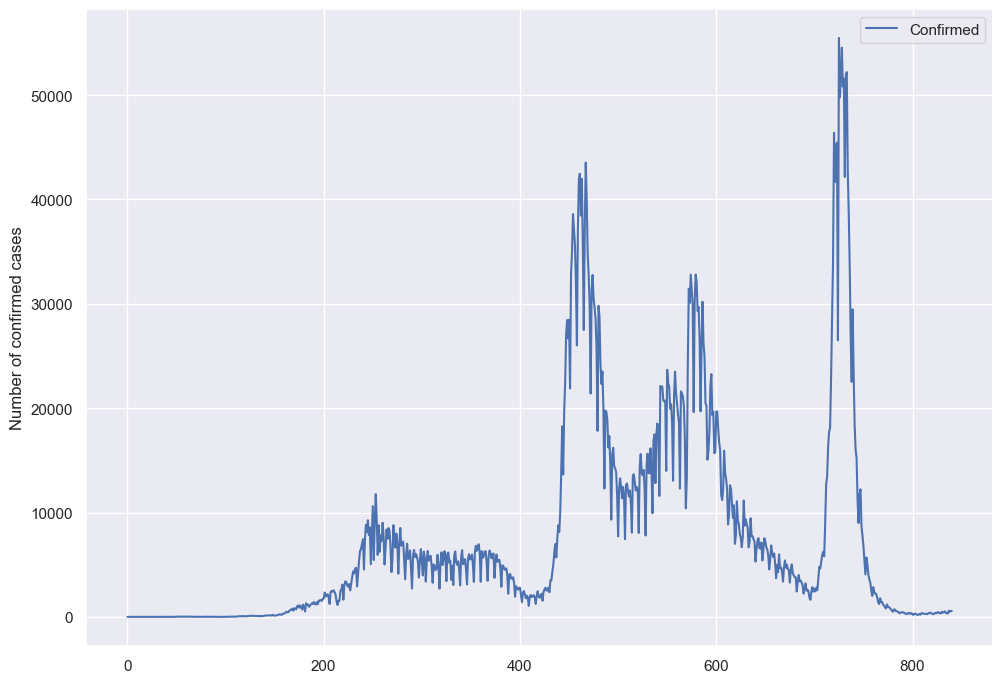

In [5]:
sns.lineplot(data)
plt.ylabel("Number of confirmed cases")

## Checking Stationarity

In [19]:
rolling_mean = data.rolling(100).mean()
rolling_std = data.rolling(100).std()

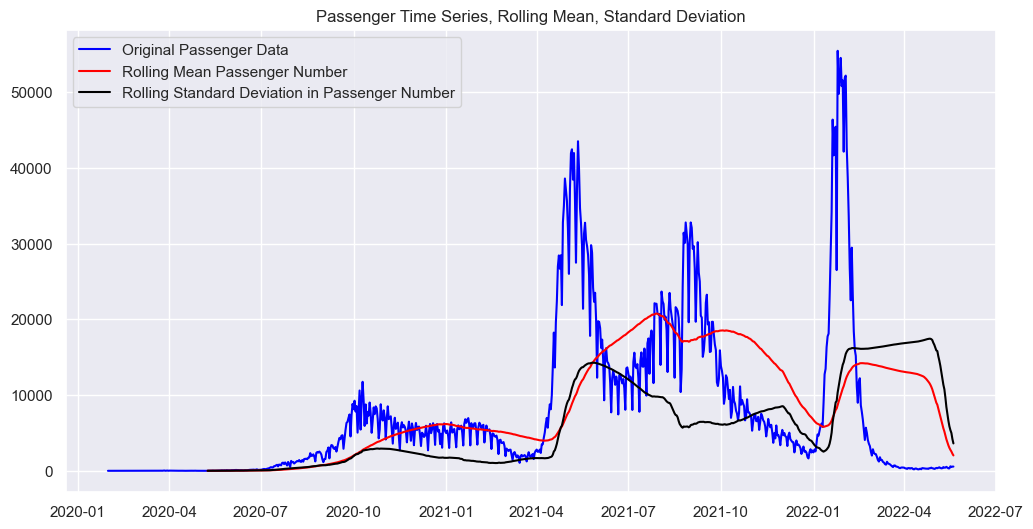

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(data, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [21]:
from statsmodels.tsa.stattools import adfuller

### "AIC" - Lag is chosen to minimize the information criterion

In [22]:
adft = adfuller(data,autolag="AIC")

In [23]:
df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'],
                             adft[4]['10%']]  ,
                   "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                             "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(df)

       Values                       Metric
0   -2.946537              Test Statistics
1    0.040198                      p-value
2   20.000000             No. of lags used
3  820.000000  Number of observations used
4   -3.438350          critical value (1%)
5   -2.865071          critical value (5%)
6   -2.568650         critical value (10%)


###   The test statistic of -2.946537 is less than the critical values at all three levels (-3.438350, -2.865071, -2.568650), indicating strong evidence to reject the null hypothesis(our time series data is stationary)

## Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

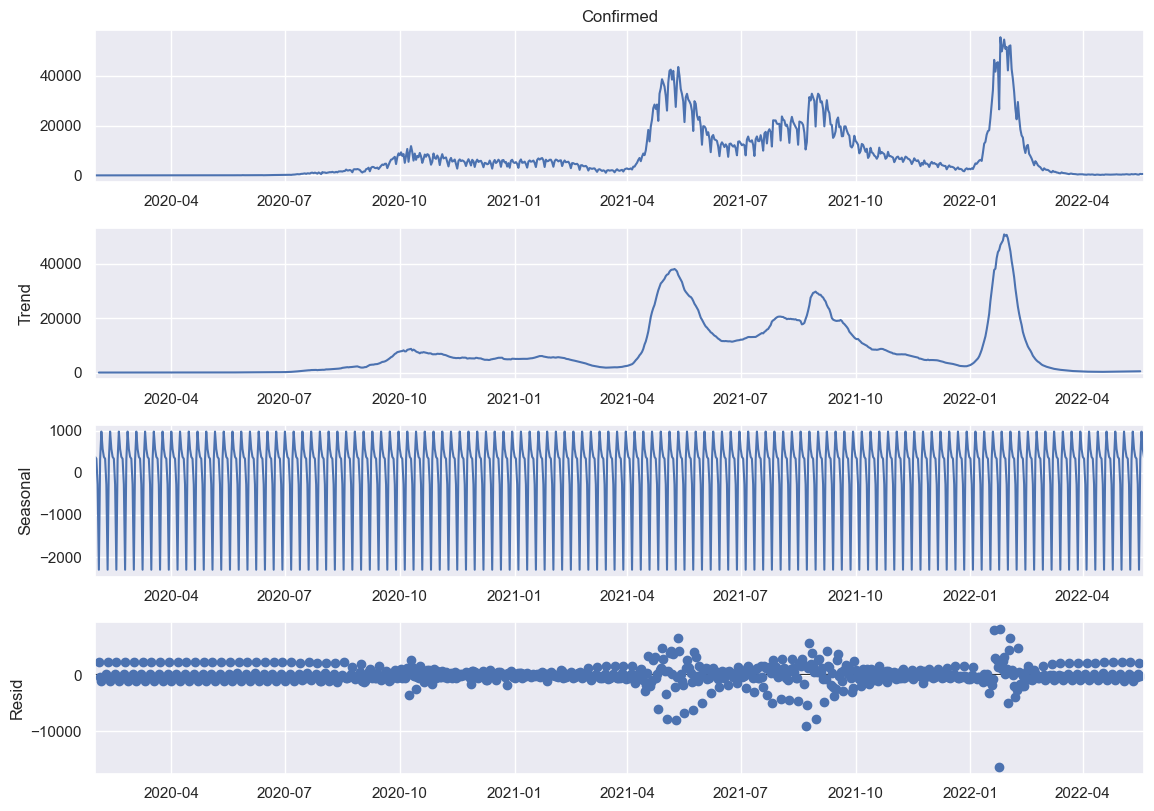

In [25]:
decompose = seasonal_decompose(data['Confirmed'],model='additive', period=7)
decompose.plot()
plt.show()

## Forecasting

### train-test split

In [48]:
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2022-03-15", format='%Y-%m-%d')]
train = train.drop(['Date'],axis = 1)

# split the dataset into train and test sets
test = data[data['Date'] >= pd.to_datetime("2022-03-15", format='%Y-%m-%d')]
test = test.drop(['Date'],axis = 1)

## Plotting train-test split

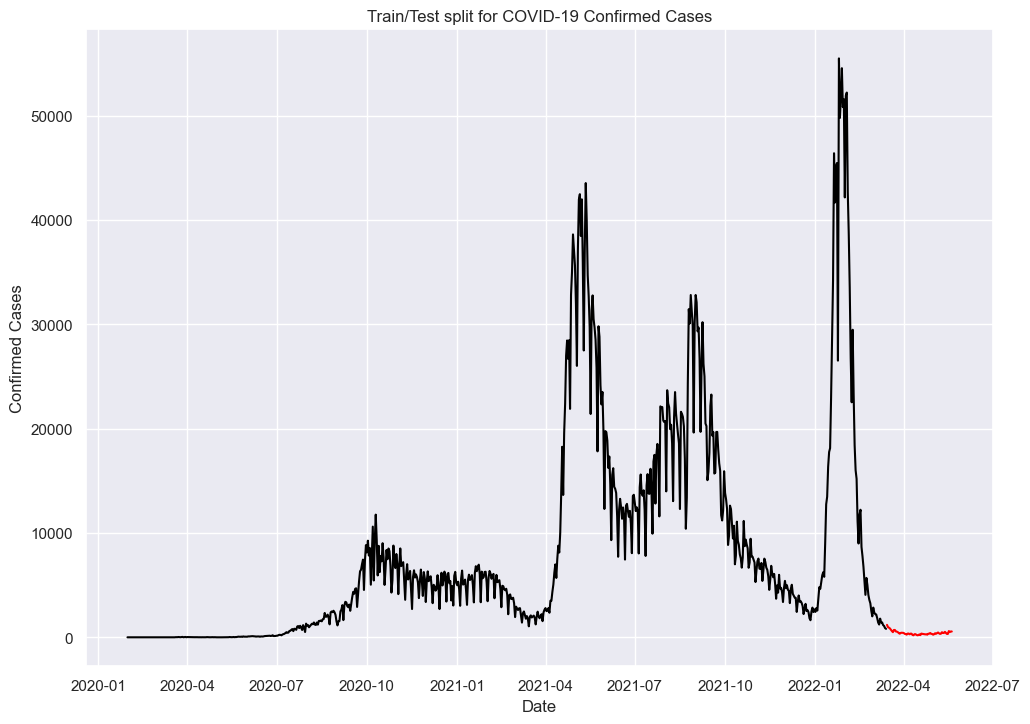

In [49]:
# plot the train and test sets
plt.plot(train, color='black')
plt.plot(test, color='red')
plt.title('Train/Test split for COVID-19 Confirmed Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
sns.set()
plt.show()

## Importing auto_arima to train our model and generate predictions

In [50]:
import pmdarima as pm
from pmdarima.arima import auto_arima

# create the Auto ARIMA model
model = auto_arima(train, seasonal=False, suppress_warnings=True,order=(2,1,5))

# fit the model to the training data
fitted = model.fit(train)

# make predictions on the test data
fcast = fitted.predict(n_periods=len(test))

# calculate the mean squared error of the predictions
forecast = pd.DataFrame(fcast,index = test.index,columns=['Prediction'])

## Plotting our forecast

<Axes: xlabel='Date'>

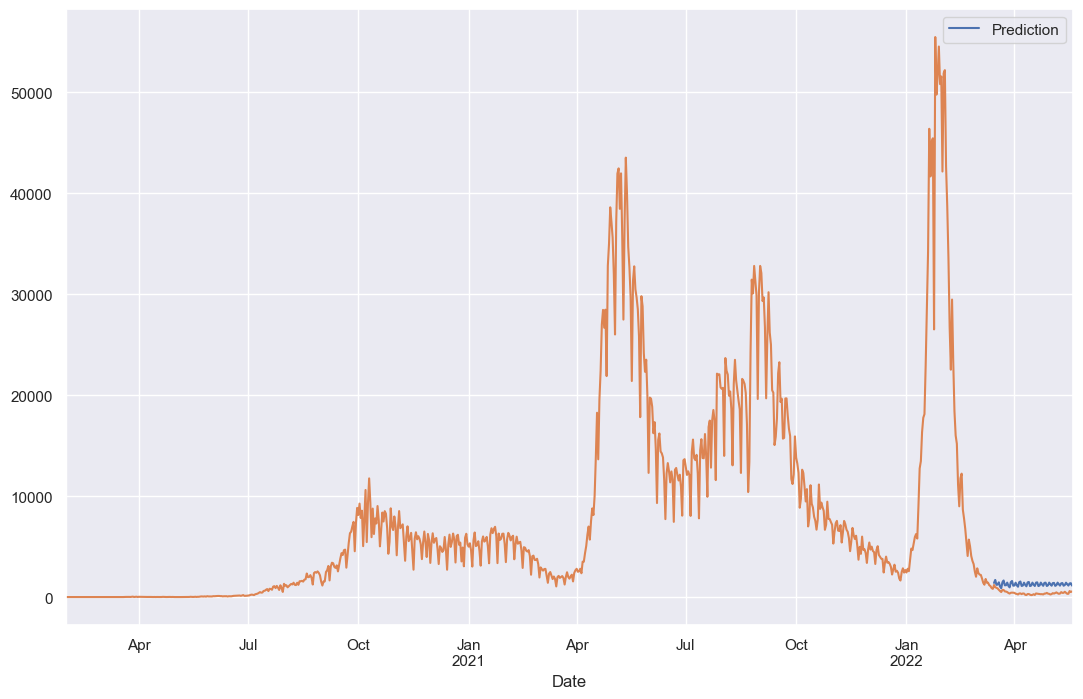

In [51]:
forecast.plot(figsize=(13,8))
data['Confirmed'].plot(figsize=(13,8))